This notebook will help you get started solving the given problem. In this challenge, we have to predict the attack type. 

In [1168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import gc
from ggplot import *

In [1169]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [1170]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [1171]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [1172]:
target = train['target']

In [1173]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

def free():
    return gc.collect()

def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()

There aren't any missing values. Let's jump to building models to get some baseline score.

# Preprocessing after Visualization

In [1174]:
for i in ['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19']:
    print(i,'  ',len(test[test[i]!=0]),'  ',len(train[train[i]!=0]))

cat_4    1    2
cat_5    25    42
cat_6    0    1
cat_7    199    335
cat_8    28    18
cat_10    81    131
cat_11    5    17
cat_12    3    4
cat_13    99    173
cat_14    35    83
cat_15    8    12
cat_16    85    164
cat_17    0    0
cat_18    0    1
cat_19    96    147


In [1175]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)

CAT_10 And CAT_13 Analysis

Analyze cont_17, cont_18  , we have found that its transformation to mean of both only correlates with cont_6 and cont_7
So, we will go with accepting this instead cont_6,cont_7 problem

In [1176]:
free()

3999

In [1177]:
train['cont_17_18_mean']=[(i+j)/2 for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_mean']=[(i+j)/2 for i,j in zip(test['cont_17'],test['cont_18'])]

train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

# plt.figure(figsize=(15,10))
# sns.heatmap(data=train.corr(),annot=False)
# plt.show()

print(train[['cont_17_18_min','cont_17_18_mean','target']].corr())

#Try Keeping both min and min coulmn still both are correalted

train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

                 cont_17_18_min  cont_17_18_mean    target
cont_17_18_min         1.000000         0.996754 -0.003298
cont_17_18_mean        0.996754         1.000000 -0.001513
target                -0.003298        -0.001513  1.000000


#Analyzing cont_6 and cont_7 

In [1178]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]
train['cont_15_16_min']=train['cont_14']*2 + np.exp(train['cont_15_16_min'])

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]
test['cont_15_16_min']=test['cont_14']*2 + np.exp(test['cont_15_16_min'])

Experiment

# adding above and without encoding categorical data, result was 781082 at 285 iteration .02eta

In [1179]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [1180]:
print(train.shape,test.shape)

(169307, 25) (91166, 24)


In [1181]:
train=train.drop(['cont_17_18_min'],1)
test=test.drop(['cont_17_18_min'],1)

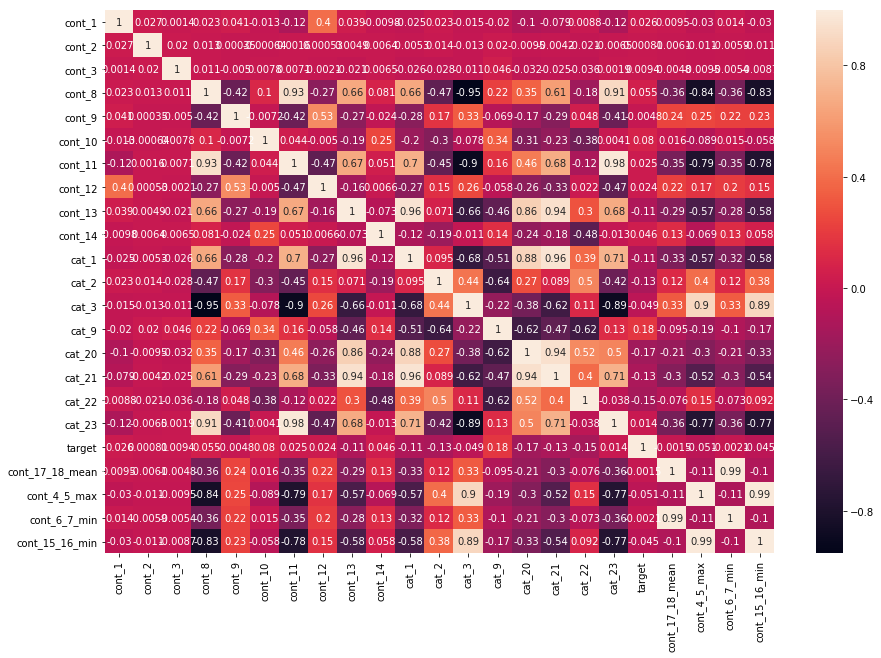

In [1182]:
plot_(train)

In [1183]:
print(train.shape,test.shape,train.columns,test.columns)

(169307, 24) (91166, 23) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'target',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object') Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object')


In [1184]:
free()

66210

In [1185]:
print(train.shape,test.shape)

(169307, 24) (91166, 23)


In [1186]:
pd.crosstab(train['cat_9'],train['target'],margins=True)

target,0,1,2,All
cat_9,,,,
0,98503,9472,36720,144695
1,365,24113,134,24612
All,98868,33585,36854,169307


cat_1

In [1187]:
pd.crosstab(train['cat_1'],train['target'],margins=True)

target,0,1,2,All
cat_1,,,,
1,27879,26446,10412,64737
2,315,6738,123,7176
3,70674,401,26319,97394
All,98868,33585,36854,169307


In [1188]:
temp_attack1_from_cat9_tr=[1 if i==1 else 0 for i in train['cat_9']]
temp_attack1_from_cat1_tr=[1 if i==2 else 0 for i in train['cat_1']]

temp_attack1_from_cat9_ts=[1 if i==1 else 0 for i in test['cat_9']]
temp_attack1_from_cat1_ts=[1 if i==2 else 0 for i in test['cat_1']]

In [1189]:
sum(temp_attack1_from_cat1_tr),sum(temp_attack1_from_cat9_tr),sum(temp_attack1_from_cat1_ts),sum(temp_attack1_from_cat9_ts)

(7176, 24612, 3829, 13185)

In [1190]:
train['most_probably_attack1']=[1 if i==1 or j==1 else 0 for i,j in zip(temp_attack1_from_cat1_tr,temp_attack1_from_cat9_tr)]
test['most_probably_attack1']=[1 if i==1 or j==1 else 0 for i,j in zip(temp_attack1_from_cat1_ts,temp_attack1_from_cat9_ts)]

In [1191]:
sum(train['most_probably_attack1']),sum(test['most_probably_attack1'])

(31788, 17014)

In [1192]:
attack_1=[1,2,3,11,15,40]
attack_0=[10,13]

In [1193]:
major_attack_1,major_attack_0=[],[]
for i in train['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
train['is_attack_1']=major_attack_1
train['is_attack_0']=major_attack_0

major_attack_1,major_attack_0,not_attack_1=[],[],[]
for i in test['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
test['is_attack_1']=major_attack_1
test['is_attack_0']=major_attack_0

In [1194]:
print(train.shape,test.shape)

(169307, 27) (91166, 26)


In [1195]:
print(train.shape,'\n',test.shape)
print(train.columns,'\n',test.columns)

(169307, 27) 
 (91166, 26)
Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'target',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'most_probably_attack1', 'is_attack_1', 'is_attack_0'],
      dtype='object') 
 Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'most_probably_attack1', 'is_attack_1', 'is_attack_0'],
      dtype='object')


Removal step 1

In [1196]:
train=train.drop(['cont_6_7_min'],1)
test=test.drop(['cont_6_7_min'],1)

Removal step 2

In [1197]:
train=train.drop(['cont_4_5_max'],1)
test=test.drop(['cont_4_5_max'],1)

Removal step 3

In [1198]:
train=train.drop(['cat_21'],1)
test=test.drop(['cat_21'],1)

Removal step 4

In [1199]:
train=train.drop(['is_attack_0'],1)
test=test.drop(['is_attack_0'],1)

Removal step 5

In [1200]:
# train['cont2_cont3_min']=[min(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
# train['cont2_cont3_max']=[max(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
# test['cont2_cont3_min']=[min(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]
# test['cont2_cont3_max']=[max(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]  #fail

# train=train.drop(['cat_9'],1)
# test=test.drop(['cat_9'],1)

# train=train.drop(['cat_1'],1)
# test=test.drop(['cat_1'],1) 

In [1201]:
# train=train.drop(['cont_10'],1)
# test=test.drop(['cont_10'],1) #fail

In [1202]:
# train=train.drop(['is_attack_1'],1)
# test=test.drop(['is_attack_1'],1)

train=train.drop(['most_probably_attack1'],1)
test=test.drop(['most_probably_attack1'],1)

# train=train.drop(['surely_attack_1'],1)
# test=test.drop(['surely_attack_1'],1)

# train=train.drop(['surely_attack_1or'],1)
# test=test.drop(['surely_attack_1or'],1)

In [1203]:
train['target'].value_counts()

0    98868
2    36854
1    33585
Name: target, dtype: int64

# Clustering

In [1204]:
# fs=list(get_features(train))
# print(fs)

In [1205]:
# from sklearn.cluster import MiniBatchKMeans
# coords = np.vstack((pd.concat([train[fs],test[fs]],0).values))
# sample_ind = np.random.permutation(len(coords))
# kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1).fit(coords[sample_ind])
# train.loc[:, 'cluster'] = kmeans.predict(train[fs])
# test.loc[:, 'cluster'] = kmeans.predict(test[fs])

In [1206]:
# train['cluster']=[1 if i in [1,3,5,6,7,8,9] else 0 for i in train['cluster'].values]
# test['cluster']=[1 if i in [1,3,5,6,7,8,9] else 0 for i in test['cluster'].values]

In [1207]:
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

In [1208]:
# pca=PCA(n_components=len(fs),svd_solver='full',random_state=131425)

In [1209]:
# pca_proj_tr=pca.fit_transform(train[fs])
# pca_proj_ts=pca.transform(test[fs])

In [1210]:
# pca_proj_tr=pd.DataFrame(pca_proj_tr,columns=['pca_'+str(i) for i  in range(20)])
# pca_proj_ts=pd.DataFrame(pca_proj_ts,columns=['pca_'+str(i) for i  in range(20)])

In [1211]:
# Project the data: this step will take several seconds
# tsne = TSNE(n_components=2, init='random', random_state=167632)
# train_proj = tsne.fit_transform(pd.concat([pca_proj_tr,pca_proj_ts],0).values)

In [1212]:
# train_proj=pd.DataFrameFrameFrame(train_proj,columns=['tsne0','tsne1'])

In [1213]:
# new_train_tsne,new_test_tsne=pd.DataFrame(),pd.DataFrame()
# train_proj.shape

In [1214]:
# train_proj.to_csv('tsne_all_data.csv',index=False)

In [1215]:
# for i in ['tsne0','tsne1']:
#     new_train_tsne[i]=train_proj[i].values[:len(train['target'])]
#     new_test_tsne[i]=train_proj[i].values[len(train['target']):]

In [1216]:
# Compute the clusters
# kmeans = KMeans(n_clusters=11, random_state=164646)
# clusters = np.array(kmeans.fit_predict(train_proj))

In [1217]:
# train['cluster']=clusters[:len(train['target'])]
# test['cluster']=clusters[len(train['target']):]

In [1218]:
# pd.crosstab(train['cluster'],train['target'],margins=True)

In [1219]:
# new_dat=pd.DataFrame()
# new_dat['target']=train.target.values
# new_dat['tsne0']=train_proj['tsne0'].values[:len(train['target'])]
# new_dat['tsne1']=train_proj['tsne1'].values[:len(train['target'])]
# chart = ggplot(new_dat, aes(x='tsne0', y='tsne1', color='target') ) \
#         + geom_point(size=75,alpha=1) \
#         + ggtitle("First and Second Principal Components colored by target")

In [1220]:
# chart

In [1221]:
train['target'].value_counts()

0    98868
2    36854
1    33585
Name: target, dtype: int64

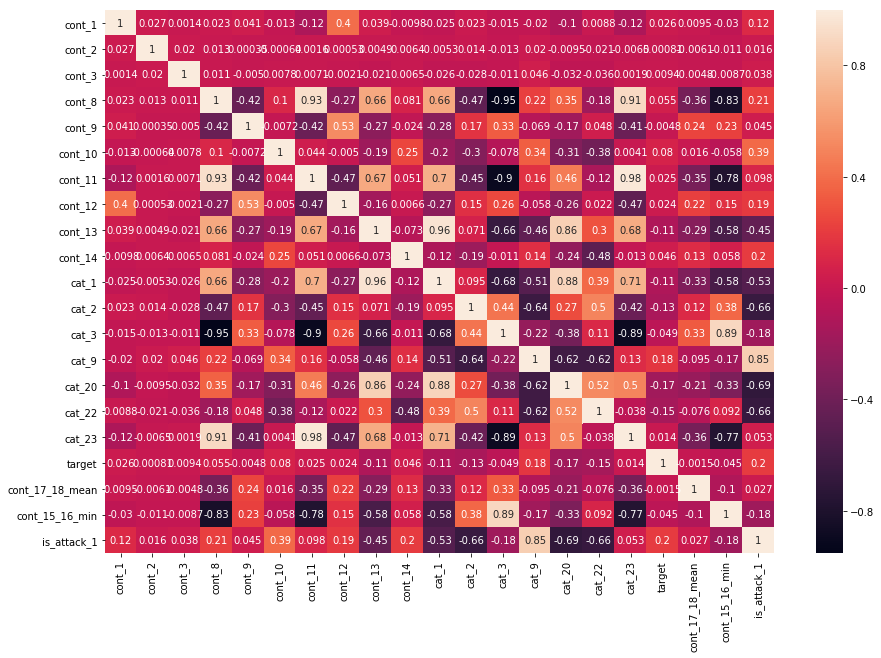

In [1222]:
plot_(train)

# MODEL XGB

In [1223]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [1224]:
X_train, X_valid, y_train, y_valid = train_test_split(train[get_features(train)], target, train_size = 0.8, stratify = target, random_state = 1996)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1225]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [1226]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params_['booster']='gbtree'
params_['lambda']=.8
params_['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [1227]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.01
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [1228]:
# dtrain = xgb.DMatrix(data=train[get_features(train)], label=target)
dtrain = xgb.DMatrix(data=X_train[get_features(train)], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[get_features(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_features(test)])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [1229]:
free()

56837

In [1230]:
train.columns,train.shape

(Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
        'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
        'cat_3', 'cat_9', 'cat_20', 'cat_22', 'cat_23', 'target',
        'cont_17_18_mean', 'cont_15_16_min', 'is_attack_1'],
       dtype='object'), (169307, 22))

In [1233]:
test.shape

(91166, 21)

In [1236]:
train.to_csv('bestTrain.csv.gz',index=False, compression='gzip')
test.to_csv('bestTest.csv.gz',index=False, compression='gzip')

In [514]:
# .02 325 iteration 780993 after step 1  , .02 375 iteration 781053 after step 2, .02 347 iteration 781082 after step 3
# .02 392 iteration 781082 after step 4 ,after step 5 .02 362-400iter 781082 , .01 631 iter sub78131 , 0.01 604 78131
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=360, feval=multAcc)


[0]	train-maccuracy:0.779852	eval-maccuracy:0.778867
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 360 rounds.
[50]	train-maccuracy:0.779195	eval-maccuracy:0.778454
[100]	train-maccuracy:0.780199	eval-maccuracy:0.77996
[150]	train-maccuracy:0.78073	eval-maccuracy:0.78055
[200]	train-maccuracy:0.780834	eval-maccuracy:0.780639
[250]	train-maccuracy:0.781018	eval-maccuracy:0.780875
[300]	train-maccuracy:0.781195	eval-maccuracy:0.780964
[350]	train-maccuracy:0.781313	eval-maccuracy:0.780993
[400]	train-maccuracy:0.78138	eval-maccuracy:0.781023
[450]	train-maccuracy:0.781468	eval-maccuracy:0.780964
[500]	train-maccuracy:0.781579	eval-maccuracy:0.780964
[550]	train-maccuracy:0.781646	eval-maccuracy:0.780934
[600]	train-maccuracy:0.781734	eval-maccuracy:0.780934
[650]	train-maccuracy:0.781786	eval-maccuracy:0.780934
Stopping. Best iteration:
[339]	train-maccuracy:0.781291	eval-maccuracy:0.781023



In [782]:
clf1_1 = xgb.train(params, dtrain,730,maximize=True) #gives 78131

In [313]:
# clf1_1 = pickle.load(open('781112_ohe.sav', 'rb'))

In [1052]:
sub=pd.read_csv('test_data.csv')

In [1053]:
# test[get_features(test)].columns,X_valid.columns

In [1054]:
pred = stacked_clf.predict(test[get_features(train)])

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 149 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 151 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 152 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 153 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 155 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 156 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 157 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 159 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 161 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 162 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 163 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 303 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 304 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 306 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 307 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 308 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 309 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 310 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 311 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 313 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 314 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 315 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 318 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 439 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 440 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 441 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 443 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 444 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 445 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 447 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 448 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 449 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 450 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 451 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 452 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 453 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 454 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 578 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 579 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 580 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 581 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 582 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 583 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 584 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 585 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 586 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 587 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 588 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 589 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 590 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 591 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 592 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 593 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 732 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 733 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 734 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 735 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 736 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 737 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 738 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 739 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 740 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 741 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 742 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 743 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 744 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 745 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 746 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 747 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Do

In [1055]:
len(pred),len(sub['connection_id'])

(91166, 91166)

In [1056]:
3## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('stacked_clf_xgb_meta.csv', index=False)

In [1057]:
import pickle
pickle.dump(clf1_1,open('stacked_clf_xgb_meta.sav','wb'))

In [1058]:
free()

62795

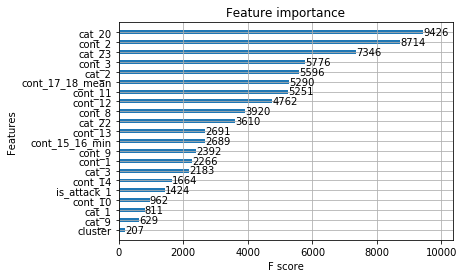

In [337]:
xgb.plot_importance(clf1_2, ax=None, height=0.4, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight',
                    grid=True)
plt.figure(figsize=(14,10))
plt.show()

# Neural Network 

In [930]:
from keras import backend as K
import tensorflow as tf

config = tf.ConfigProto(intra_op_parallelism_threads=4,
                        inter_op_parallelism_threads=4,
                        allow_soft_placement=True,
                        device_count = {'CPU': 2})
session = tf.Session(config=config)
K.set_session(session)

In [931]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [932]:
model=Sequential()
model.add(Dense(50, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,input_dim=20 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,input_dim=20 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, input_dim=20,activation='softmax'))

In [933]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [934]:
x=train[get_features(train)].values
y=train['target'].values

In [935]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y=ohe.fit_transform(y.reshape(-1,1))

In [936]:
y=y.toarray()
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [938]:
# model.fit(x, y,epochs=1000,batch_size=10)

In [837]:
predi=model.predict(test[get_features(train)].values)

In [839]:
li=[]
for i in range(len(predi)):
    li.append(0 if predi[i][0]==1 else(1 if predi[i][1]==1 else 2))

In [847]:
li.count(2)

35

# Stacking

In [1147]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
import sklearn

In [1148]:
from sklearn.metrics import accuracy_score
#print(accuracy_score(y_valid,lgb_model.predict(X_valid[get_features(train)].values)))

In [1163]:
import xgboost as xgb


class CustomXGboost:

    def __init__(self,params, num_boost_round=10, maximize=False):
        self.params=params
        self.num_boost_round=num_boost_round
        self.maximize=maximize
        
    def fit(self,train,target):
        dtrain = xgb.DMatrix(data=train, label=target)        
        self.clf = xgb.train(params=params,dtrain=dtrain, num_boost_round=self.num_boost_round, maximize=self.maximize)
        return self.clf
    
    def predict(self,dtest):
        dtest=xgb.DMatrix(data=dtest)
        return self.clf.predict(dtest)

In [1164]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3 = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')
clf4=RandomForestClassifier(n_estimators=800, criterion='entropy', max_depth=None, min_samples_split=2,
                           min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=True, n_jobs=-1, random_state=646168, verbose=50,
                           warm_start=False, class_weight=None)
clf5=GradientBoostingClassifier(loss='deviance', learning_rate=0.005, n_estimators=1500, 
                                subsample=.9, criterion='friedman_mse', min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                min_impurity_decrease=0.0, min_impurity_split=None, init=None,
                                random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                warm_start=False, presort='auto')
# clf6 = xgb.XGBClassifier(max_depth=7, n_estimators=600, colsample_bytree=0.8, 
#                         subsample=0.8, nthread=-1, learning_rate=0.01,objective='multi:softmax', scale_pos_weight=.6)
# clf7 = xgb.XGBClassifier(max_depth=7, n_estimators=975, colsample_bytree=0.8, 
#                         subsample=0.8, nthread=-1, learning_rate=0.0075,objective='multi:softmax', scale_pos_weight=.6)
# clf8 = xgb.XGBClassifier(max_depth=7, n_estimators=700, colsample_bytree=0.8, 
#                         subsample=0.8, nthread=-1, learning_rate=0.009, scale_pos_weight=.6,objective='multi:softmax')

clf6=xgb.XGBClassifier(max_depth=5, learning_rate=0.001, n_estimators=2500, silent=True,
                       objective='multi:softmax', nthread=-1,
                       gamma=0, min_child_weight=10, max_delta_step=0, subsample=.9, colsample_bytree=.9,
                       colsample_bylevel=1.0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
                       missing=None)

# default parameters
params1 = {}
params1['objective'] = 'multi:softmax'
params1['eta'] = 0.01
params1['silent'] = True
params1['max_depth'] = 6
params1['subsample'] = 0.9
params1['colsample_bytree'] = 0.9
params1['nthread']=-1
params1['num_class']=3

# default parameters
params2 = {}
params2['objective'] = 'multi:softmax'
params2['eta'] = 0.0075
params2['silent'] = True
params2['max_depth'] = 6
params2['subsample'] = 0.9
params2['colsample_bytree'] = 0.9
params2['nthread']=-1
params2['num_class']=3

# default parameters
params3 = {}
params3['objective'] = 'multi:softmax'
params3['eta'] = 0.01
params3['silent'] = True
params3['max_depth'] = 7
params3['subsample'] = 0.9
params3['colsample_bytree'] = 0.9
params3['nthread']=-1
params3['num_class']=3

clf7=CustomXGboost(params=params1,num_boost_round=631,maximize=True)
clf8=CustomXGboost(params=params2,num_boost_round=884,maximize=True)
clf9=CustomXGboost(params=params3,num_boost_round=604,maximize=True)



In [1165]:
# stack = Ensemble(n_splits=3,
#         stacker = clf3,
#         base_models = (clf7,clf8,clf9))        
        
# y_pred = stack.fit_predict(train[get_features], target, test[get_features(train)])

In [1166]:
stacked_clf=StackingClassifier(classifiers=[clf7,clf8,clf9],
                         meta_classifier=clf7,use_probas=False)

In [1153]:
# print(accuracy_score(y_valid,y_pred))

In [1154]:
# clf4.fit(X_train[get_features(train)],y_train)

In [1155]:
# print(accuracy_score(y_valid,clf4.predict(X_valid[get_features(train)])))

In [1167]:
stacked_clf.fit(X_train[get_features(train)],y_train)

TypeError: Cannot clone object '<__main__.CustomXGboost object at 0x000001D80C7D1BE0>' (type <class '__main__.CustomXGboost'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [1158]:
# print(accuracy_score(y_valid,stacked_clf.predict(X_valid[get_features(train)])))

In [ ]:
#X_train, X_valid, y_train, y_valid


In [ ]:
upperbound,lowerbound=np.percentile(feature_name,1,99)
y=np.clip(x,upperbound,lowerbounad)

#rank transformation,log transformation np.log(1+x),np.sqrt(x+2/3)